In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# ratings = pd.read_csv(r'datasets/title.ratings.tsv/data.tsv',sep='\t')

In [3]:
# akas = pd.read_csv(r'datasets/title.akas.tsv/data.tsv', sep='\t',low_memory=False)
# basics = pd.read_csv(r'datasets/title.basics.tsv/data.tsv', sep='\t',low_memory=False)

In [4]:
# df = pd.merge(basics,ratings,on='tconst')

In [5]:
# df.to_csv('imdb_large.csv',index=False)

In [6]:
df = pd.read_csv('imdb_large.csv',low_memory=False)

In [7]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1627
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,196
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1317
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,119
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2102


In [9]:
df['startYear'] = [0 if year == '\\N' else int(year) for year in df['startYear']]

In [10]:
df['endYear'] = [year if year == '\\N' else int(year) for year in df['endYear']]

In [11]:
df = df[df['startYear']>=1960]

In [12]:
df.drop(['runtimeMinutes'],axis=1,inplace=True)

In [13]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
4082,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,"Drama,Mystery,Romance",6.2,20
4532,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,"Comedy,Musical",5.6,15
5089,tt0018295,short,El puño de hierro,El puño de hierro,0,2004,\N,"Action,Drama,Short",6.6,28
14051,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,Comedy,7.1,8
17278,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,"Comedy,Fantasy,Romance",6.4,77499


In [14]:
df['titleType'].value_counts()

tvEpisode       467286
movie           216208
short           102792
tvSeries         68719
video            56674
tvMovie          43641
videoGame        10975
tvMiniSeries     10202
tvSpecial         8979
tvShort           3187
Name: titleType, dtype: int64

In [15]:
def helper_func(title_type):
    if title_type in ['short','tvShort','tvEpisode','videoGame']:
        return np.nan
    else:
        return title_type

In [16]:
df['titleType'] =  df['titleType'].apply(helper_func)

In [17]:
df = df[df['titleType'].notna()]

In [18]:
df['genres'] = df['genres'].apply(lambda x: np.nan if x == '\\N' else x)

In [19]:
df = df[df['genres'].notna()]

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
0,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,"Drama,Mystery,Romance",6.2,20
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,"Comedy,Musical",5.6,15
2,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,Comedy,7.1,8
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,"Comedy,Fantasy,Romance",6.4,77499
4,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,"Drama,War",6.5,252


In [22]:
df.to_csv('imdb.csv',index=False)

In [23]:
imdb = pd.read_csv('imdb.csv')

In [24]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
0,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,"Drama,Mystery,Romance",6.2,20
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,"Comedy,Musical",5.6,15
2,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,Comedy,7.1,8
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,"Comedy,Fantasy,Romance",6.4,77499
4,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,"Drama,War",6.5,252


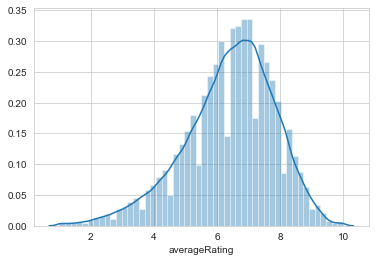

In [25]:
sns.distplot(imdb['averageRating'])

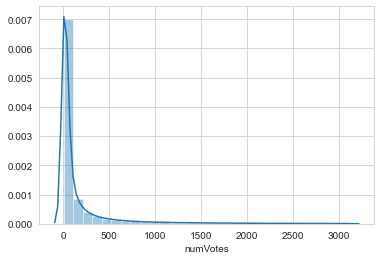

In [26]:
sns.distplot(imdb['numVotes'][imdb['numVotes']<=3124],bins=30)

In [27]:
imdb['numVotes'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count     389188.00
mean        2326.16
std        25982.65
min            5.00
25%           11.00
50%           34.00
75%          169.00
95%         3124.00
max      2260919.00
Name: numVotes, dtype: float64

In [28]:
imdb['averageRating'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count    389188.00
mean          6.40
std           1.44
min           1.00
25%           5.60
50%           6.60
75%           7.40
95%           8.50
max          10.00
Name: averageRating, dtype: float64

In [29]:
imdb.corr()

,isAdult,startYear,averageRating,numVotes
isAdult,1.000000,-0.062608,-0.015754,-0.019458
startYear,-0.062608,1.000000,0.027049,0.013428
averageRating,-0.015754,0.027049,1.000000,0.044716
numVotes,-0.019458,0.013428,0.044716,1.000000


In [276]:
imdb = pd.read_csv('imdb.csv')

In [277]:
imdb = imdb[(imdb['numVotes']>=2500) & (imdb['averageRating']>=6.4)]

In [278]:
imdb.reset_index(drop=True,inplace=True)

In [279]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,"Comedy,Fantasy,Romance",6.4,77499
1,tt0052698,movie,Classe Tous Risques,Classe tous risques,0,1960,\N,"Crime,Drama,Romance",7.5,3074
2,tt0052832,movie,The Fugitive Kind,The Fugitive Kind,0,1960,\N,"Drama,Romance",7.1,5361
3,tt0052997,movie,The League of Gentlemen,The League of Gentlemen,0,1960,\N,"Comedy,Crime,Thriller",7.3,3738
4,tt0053106,movie,Letter Never Sent,Neotpravlennoe pismo,0,1960,\N,"Adventure,Drama",7.9,2909


In [280]:
imdb['startYear'] = [year if year == '\\N' else int(year) for year in imdb['startYear']]

In [281]:
imdb['endYear'] = [year if year == '\\N' else int(year) for year in imdb['endYear']]

In [282]:
imdb['primaryTitle'] = imdb['primaryTitle'].apply(lambda x: x.strip("'*"))
bool_mask = imdb['primaryTitle'].str[0].str.isalpha()
alpha_list = imdb['primaryTitle'][bool_mask].sort_values()
non_alpha_list = imdb['primaryTitle'][~bool_mask].sort_values()
imdb = imdb.iloc[alpha_list.append(non_alpha_list).index]

In [283]:
imdb.index = imdb['tconst']

In [284]:
tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']

In [285]:
movie_df = imdb[imdb['titleType'].apply(lambda x: x not in tv_shows)]

In [286]:
tv_shows_df = imdb[imdb['titleType'].apply(lambda x: x in tv_shows)]

In [287]:
tv_shows_dict = {k: f"{t} ({s})" if s == e else f"{t} ({s}– )" if e =='\\N' else f"{t} ({s}–{e})" for k,t,s,e in tv_shows_df[['primaryTitle','startYear','endYear']].itertuples()}

In [288]:
movie_dict = {k: f"{t} ({s})"  for k,t,s,e in movie_df[['primaryTitle','startYear','endYear']].itertuples()}

In [289]:
sortedTitle = pd.Series(tv_shows_dict).append(pd.Series(movie_dict))

In [290]:
imdb.reset_index(drop=True, inplace=True)

In [291]:
sortedTitle = pd.DataFrame(sortedTitle).reset_index().rename({'index':'tconst',0:'sortedTitle'},axis=1)

In [292]:
sortedTitle.head()

,tconst,sortedTitle
0,tt0101049,A Bit of Fry and Laurie (1987–1995)
1,tt0385567,A Boyfriend for Christmas (2004– )
2,tt2415112,A Bride for Christmas (2012– )
3,tt0059026,A Charlie Brown Christmas (1965– )
4,tt0216621,A Christmas Carol (1999– )


In [293]:
imdb = imdb.merge(sortedTitle, on='tconst')

In [294]:
imdb['genres'] = [genre.replace(',', ' ') for genre in imdb['genres']]

In [295]:
imdb['imdb_url'] = imdb['tconst'].apply(lambda titleId: f'https://www.imdb.com/title/{titleId}/')

In [296]:
imdb.reset_index(drop=True, inplace=True)

In [297]:
imdb.to_csv('imdb_sampled.csv', index=False)

In [2]:
imdb = pd.read_csv('imdb_sampled.csv')

In [3]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle,imdb_url
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011),https://www.imdb.com/title/tt1509787/
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017),https://www.imdb.com/title/tt5091612/
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012),https://www.imdb.com/title/tt2064713/
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971),https://www.imdb.com/title/tt0067656/
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019),https://www.imdb.com/title/tt3224458/


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer(dtype=np.uint8)

In [6]:
dtm = cv.fit_transform(imdb['genres']).toarray()

In [7]:
dtm.shape

(14051, 30)

In [8]:
new_matrix = np.concatenate((dtm, np.array(imdb['averageRating']).reshape(-1,1)),axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
MMS = MinMaxScaler()

In [11]:
numVotes = np.array(imdb['numVotes'])

In [12]:
numVotes = numVotes.reshape(-1,1)

In [13]:
numVotes = MMS.fit_transform(numVotes)

In [14]:
new_matrix = np.concatenate((new_matrix,numVotes),axis=1)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
similarities = cosine_similarity(new_matrix,dense_output=False)

In [17]:
similarities.shape

(14051, 14051)

In [148]:
def build_recommendations(title):
    try:
        title = title.lower()
        tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']
#         sorted_title_found = True in imdb['sortedTitle'].apply(lambda t: t.lower() == title)
        try:
            idx = imdb[imdb['sortedTitle'].apply(lambda x: x.lower())==title].index[0]
        except:
            idx = imdb[imdb['primaryTitle'].apply(lambda x: x.lower())==title].index[0]
             
        recommendations = imdb['sortedTitle'].iloc[similarities[idx].argsort()[::-1]][0:500] # slicing only 500 values for improved performance (process explained below)

        if imdb.iloc[idx]['titleType'] != 'movie':
            tv_recommendations = {rec:[imdb['tconst'].iloc[rec],imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] in tv_shows}
            return pd.DataFrame(tv_recommendations).transpose().iloc[1:11]

        else:
            movie_recommendations = {rec:[imdb['tconst'].iloc[rec], imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] == 'movie'}
            return pd.DataFrame(movie_recommendations).transpose().iloc[1:11]
    except:
        return None

In [149]:
def get_recommendations(title):
    recommendations = build_recommendations(title)
    if recommendations is None:
        return recommendations
    else:
        recommendations.rename(columns={0:'tconst',1:'title'},inplace=True)
        recommendations.reset_index(drop=True, inplace=True)
        recommendations['urls'] = [f'https://www.imdb.com/title/{title_id}/' for title_id in recommendations['tconst']]
        return recommendations.drop('tconst',axis=1)

In [127]:
# before slicing
%timeit get_recommendations('IT')

854 ms ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [120]:
recom_len = []
for item in imdb['primaryTitle']:
    recom_len.append(build_recommendations(item).shape[0])

In [146]:
# we can see here, we only need to slice 500 values to get atleast 10 recommendations of the same category (tvShow or movie)
# see 'min' value
slice_500 = pd.Series(recom_len).describe().round(2)
slice_500

count    14051.00
mean       325.07
std        108.66
min         32.00
25%        251.00
50%        356.00
75%        414.00
max        468.00
dtype: float64

In [132]:
%timeit get_recommendations('IT')

36.6 ms ± 786 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [155]:
# After slicing only the required sample of values from 'recommendations' variable (i.e minimum value of 10) we see a drastic
# performance improvement
print(f"Speed of Prediction: {((854-36.6)/854)*100:.2f}% increase")

Speed of Prediction: 95.71% increase


In [157]:
get_recommendations('Interstellar')

,title,urls
0,The Martian (2015),https://www.imdb.com/title/tt3659388/
1,Battle Royale (2000),https://www.imdb.com/title/tt0266308/
2,Time After Time (1979),https://www.imdb.com/title/tt0080025/
3,2001: A Space Odyssey (1968),https://www.imdb.com/title/tt0062622/
4,Brazil (1985),https://www.imdb.com/title/tt0088846/
5,Planet of the Apes (1968),https://www.imdb.com/title/tt0063442/
6,A.I. Artificial Intelligence (2001),https://www.imdb.com/title/tt0212720/
7,Close Encounters of the Third Kind (1977),https://www.imdb.com/title/tt0075860/
8,Stalker (1979),https://www.imdb.com/title/tt0079944/
9,Frankenstein (2011),https://www.imdb.com/title/tt1795369/
